<a href="https://colab.research.google.com/github/CarmelaRS/CarmelaPythonLUCATIC/blob/main/numpyejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### EJERCICIO NUMPY: ANALISIS DE CALIFICACIONES Y RENDIMIENTO DE PELICULAS
# Objetivos
  * Realizar análisis estadísticos y manipulaciones de datos utilizando Numpy.  
  * Aplicar técnicas de preparación de datos para trabajar con tipos de datos numéricos y manejar valores faltantes.

# Tareas
  * **Preparación de Datos**
    * Cargar el dataset y seleccionar las columnas relevantes para el análisis: 'Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)'.
    * Convertir estas columnas a un array de Numpy.
    * Manejar los valores faltantes en 'Revenue (Millions)' reemplazándolos con la media de la columna.
  * **Análisis Estadístico con Numpy**
    * Calcular la calificación promedio de las películas.
    * Encontrar la película con la duración más larga.
    * Determinar el ingreso promedio y la mediana de los ingresos de las películas.
  * **Manipulación de Datos**
    * Crear un subconjunto de datos con películas lanzadas en los últimos 10 años.
    * Calcular el promedio de votos para este subconjunto.
  * **Correlación**
    * Evaluar si hay una correlación entre la calificación de IMDb y los ingresos de las películas. Represéntalo con matplotlib.pyplot

In [2]:
# importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### TAREAS
**Preparación de Datos**  
* Cargar el dataset y seleccionar las columnas relevantes para el análisis: 'Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)'.
* Convertir estas columnas a un array de Numpy.
* Manejar los valores faltantes en 'Revenue (Millions)' reemplazándolos con la media de la columna.
  

In [3]:
#1. Cargamos el Dataset:
# LECTURA DE ARCHIVO CSV
df = pd.read_csv('https://drive.google.com/uc?id=1ISERpWSZWPU9oHAdDU0NUf-50lBrw4EH')


# Mostramos el df
# Imprimimos el dataframe
print(df.to_string(index=False))

 Rank                                                         Title                      Genre                                                                                                                                                                                                                                                                                                                                                                                                                           Description                         Director                                                                        Actors  Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore
    1                                       Guardians of the Galaxy    Action,Adventure,Sci-Fi                                                                                                                                                                                                              

In [4]:
# GUARDAMOS SOLO LAS COLUMNAS RELEVANTES Ç
columnas_relevantes = ['Title', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)']
df_final = df[columnas_relevantes]

# Mostrar las primeras filas del dataset seleccionado
print(df_final)

                       Title  Year  Runtime (Minutes)  Rating   Votes  \
0    Guardians of the Galaxy  2014                121     8.1  757074   
1                 Prometheus  2012                124     7.0  485820   
2                      Split  2016                117     7.3  157606   
3                       Sing  2016                108     7.2   60545   
4              Suicide Squad  2016                123     6.2  393727   
..                       ...   ...                ...     ...     ...   
995     Secret in Their Eyes  2015                111     6.2   27585   
996          Hostel: Part II  2007                 94     5.5   73152   
997   Step Up 2: The Streets  2008                 98     6.2   70699   
998             Search Party  2014                 93     5.6    4881   
999               Nine Lives  2016                 87     5.3   12435   

     Revenue (Millions)  
0                333.13  
1                126.46  
2                138.12  
3                27

In [5]:
# 2. convertimos las columnas en un array numpy
df_array = df_final.to_numpy()
print(df_array)

[['Guardians of the Galaxy' 2014 121 8.1 757074 333.13]
 ['Prometheus' 2012 124 7.0 485820 126.46]
 ['Split' 2016 117 7.3 157606 138.12]
 ...
 ['Step Up 2: The Streets' 2008 98 6.2 70699 58.01]
 ['Search Party' 2014 93 5.6 4881 nan]
 ['Nine Lives' 2016 87 5.3 12435 19.64]]


In [6]:
# 3. Los valores faltantes en 'Revenue (Millions)' los remplazamos por la media de la columna
# Verificamos que hay valores faltantes
print("Valores faltantes antes de reemplazar:")
print(df_final.isnull().sum())

Valores faltantes antes de reemplazar:
Title                   0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
dtype: int64


In [7]:
# Calculamos la media de la columna ('Revenue (Millions)')
media_revenue = df_final['Revenue (Millions)'].mean()

# Reemplazamos los valores faltantes con la media
df_final['Revenue (Millions)'].fillna(media_revenue, inplace=True)

<ipython-input-7-34cf9eb63864>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['Revenue (Millions)'].fillna(media_revenue, inplace=True)
<ipython-input-7-34cf9eb63864>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Revenue (Millions)'].fillna(media_revenue, inplace=True)


In [8]:
# Comprobamos que no quedan valores nulos
print("Valores faltantes después de reemplazar:")
print(df_final.isnull().sum())

Valores faltantes después de reemplazar:
Title                 0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
dtype: int64


**Análisis Estadístico con Numpy**  
* Calcular la calificación promedio de las películas.
* Encontrar la película con la duración más larga.
* Determinar el ingreso promedio y la mediana de los ingresos de las películas.


In [10]:
# 1. Calculamos la calificacion promedio de las peliculas
clasificacion_promedio = df_final['Rating'].mean()
print("La calificacion promedio de las peliculas es:", clasificacion_promedio)

La calificacion promedio de las peliculas es: 6.723199999999999


In [11]:
# 2. Encontrar la película con la duración más larga.
# Ordenamos el dataset de manera ascendente segun la duracion
df_final = df_final.sort_values(by='Runtime (Minutes)', ascending=False)
print(" Dataset ordenado por duracion de manera ascendente:\n", df_final)
# De este codigo sacamos que la pelicula más larga es la primera que sale en la lista

 Dataset ordenado por duracion de manera ascendente:
                        Title  Year  Runtime (Minutes)  Rating   Votes  \
828               Grindhouse  2007                191     7.6  160350   
88         The Hateful Eight  2015                187     7.8  341170   
965            Inland Empire  2006                180     7.0   44227   
311           La vie d'Adèle  2013                180     7.8  103150   
82   The Wolf of Wall Street  2013                180     8.2  865134   
..                       ...   ...                ...     ...     ...   
711          La tortue rouge  2016                 80     7.6   11482   
949                    Kicks  2016                 80     6.1    2417   
42   Don't Fuck in the Woods  2016                 73     2.7     496   
819       Wolves at the Door  2016                 73     4.6     564   
793      Ma vie de Courgette  2016                 66     7.8    4370   

     Revenue (Millions)  
828           25.030000  
88            54.

In [12]:
# 3. De una forma mas directa, encontramos la pelicula con mayor duracion:
pelicula_mas_larga = df_final.loc[df_final['Runtime (Minutes)'].idxmax()]
print("La pelicula con mayor duracion es:\n", pelicula_mas_larga)

La pelicula con mayor duracion es:
 Title                 Grindhouse
Year                        2007
Runtime (Minutes)            191
Rating                       7.6
Votes                     160350
Revenue (Millions)         25.03
Name: 828, dtype: object


In [13]:
# Determinar el ingreso promedio y la mediana de los ingresos de las películas.
print("Los ingresos promedio son: ", df_final['Revenue (Millions)'].mean())
print("La mediana de los ingresos es: ", df_final['Revenue (Millions)'].median())

Los ingresos promedio son:  82.956376146789
La mediana de los ingresos es:  60.375


**Manipulación de Datos**  
* Crear un subconjunto de datos con películas lanzadas en los últimos 10 años.
* Calcular el promedio de votos para este subconjunto.


In [15]:
# 1. Crear un subconjunto de datos con películas lanzadas en los últimos 10 años.

# Conseguimos el año mayor de las peliculas
año_max = df_final['Year'].max()
print("El año mayor es: ", año_max)

# Guardamos el df de las peliculas de los ultimos 10 años
df_10anios = df_final[df_final['Year'] >= año_max - 10]
print("Las peliculas de los ultimos 10 años son:\n", df_10anios)

El año mayor es:  2016
Las peliculas de los ultimos 10 años son:
                        Title  Year  Runtime (Minutes)  Rating   Votes  \
828               Grindhouse  2007                191     7.6  160350   
88         The Hateful Eight  2015                187     7.8  341170   
965            Inland Empire  2006                180     7.0   44227   
311           La vie d'Adèle  2013                180     7.8  103150   
82   The Wolf of Wall Street  2013                180     8.2  865134   
..                       ...   ...                ...     ...     ...   
711          La tortue rouge  2016                 80     7.6   11482   
949                    Kicks  2016                 80     6.1    2417   
42   Don't Fuck in the Woods  2016                 73     2.7     496   
819       Wolves at the Door  2016                 73     4.6     564   
793      Ma vie de Courgette  2016                 66     7.8    4370   

     Revenue (Millions)  
828           25.030000  
88   

In [16]:
# 2. Calcular el promedio de votos para este subconjunto.
promedio_votos = df_final['Votes'].mean()
print("El promedio de votos de las peliculas de los ultimos 10 años es: ", promedio_votos)

El promedio de votos de las peliculas de los ultimos 10 años es:  169808.255


**Correlación**  
* Evaluar si hay una correlación entre la calificación de IMDb y los ingresos de las películas. Represéntalo con matplotlib.pyplot

Correlación entre la calificación de IMDb y los ingresos: 0.19


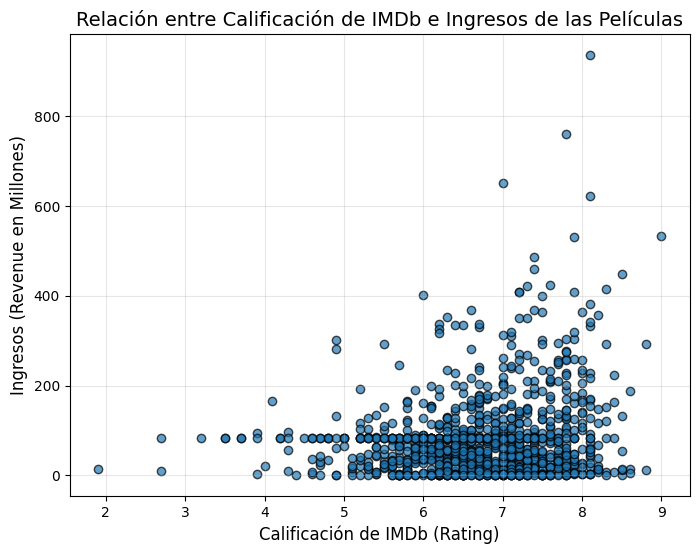

In [17]:
# Calcular la correlación entre 'Rating' y 'Revenue (Millions)'
correlacion = df_final['Rating'].corr(df_final['Revenue (Millions)'])
print(f"Correlación entre la calificación de IMDb y los ingresos: {correlacion:.2f}")

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df_final['Rating'], df_final['Revenue (Millions)'], alpha=0.7, edgecolor='k')
plt.title('Relación entre Calificación de IMDb e Ingresos de las Películas', fontsize=14)
plt.xlabel('Calificación de IMDb (Rating)', fontsize=12)
plt.ylabel('Ingresos (Revenue en Millones)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()